In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import keras


In [2]:
(x_train0, y_train0), (x_test0, y_test0) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


### 1. Shape of input images and results

In [3]:
print('keras dataset :::')
print('input train shape :',x_train0.shape,'    input test shape :',x_test0.shape)
print('output train shape :',y_train0.shape,'           outpu test shape :',y_test0.shape)

keras dataset :::
input train shape : (50000, 32, 32, 3)     input test shape : (10000, 32, 32, 3)
output train shape : (50000, 1)            outpu test shape : (10000, 1)


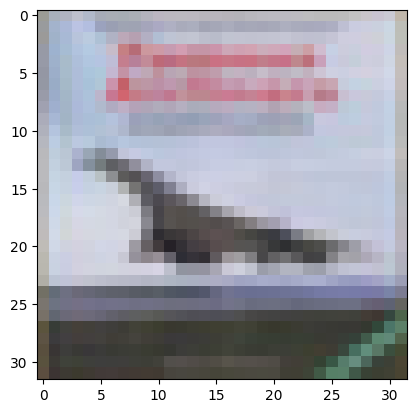

In [4]:
plt.imshow(x_test0[3])

### concatenating original test and train data

In [5]:
whole_input_data = np.concatenate((x_train0,x_test0),dtype=float,axis=0)
whole_input_data.shape

(60000, 32, 32, 3)

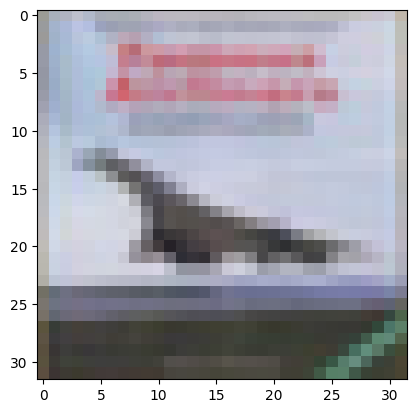

In [6]:
plt.imshow(whole_input_data[50003].astype((np.uint8)))

In [7]:
whole_output_data = np.concatenate((y_train0,y_test0),dtype=float,axis=0)
whole_output_data.shape

(60000, 1)

### normalizing image array

In [8]:
whole_input_data = whole_input_data/255.0

###  2. slpit whole date 15% for test

In [9]:
x_train1, x_test, y_train1, y_test = train_test_split(whole_input_data,whole_output_data,test_size=0.15)

In [10]:
print('x_test shape:       ',x_test.shape,' and ',y_test.shape,)
print('x_train1 shape:     ',x_train1.shape,' and ',y_train1.shape)

x_test shape:        (9000, 32, 32, 3)  and  (9000, 1)
x_train1 shape:      (51000, 32, 32, 3)  and  (51000, 1)


### 3. Reshaping output to use categorical_crossentropy and fit the model



In [11]:
new_y_tr = []

for y in y_train1:
    target = [0,0,0,0,0,0,0,0,0,0]
    target[int(y[0])]=1
    new_y_tr.append(target)

y_train1 = np.array(new_y_tr)

print('shape of y_train1 :',y_train1.shape)

shape of y_train1 : (51000, 10)


In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32,3]))
model.add(keras.layers.Dense(150, activation="relu",name='h1'))
model.add(keras.layers.Dense(100, activation="relu",name='h2'))
model.add(keras.layers.Dense(50, activation="relu",name='h3'))
model.add(keras.layers.Dense(10, activation='softmax',name='h4'))

### trying to set F1score as a metric, but it fails...

In [ ]:
!pip install tf-nightly

In [13]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy','AUC']
              )
# tf.keras.metrics.F1Score(average=None, threshold=None, name='f1_score', dtype=None)                 I DONT KNOW HOW IT WORKS ... :(

In [14]:
tb_callback = keras.callbacks.TensorBoard("tb_log")
history = model.fit(x_train1, y_train1, epochs=100, validation_split=0.2, callbacks=[tb_callback])

Epoch 1/100
1275/1275 [==============================] - 14s 10ms/step - loss: 1.9572 - accuracy: 0.2908 - auc: 0.7517 - val_loss: 1.8426 - val_accuracy: 0.3330 - val_auc: 0.7897
Epoch 2/100
1275/1275 [==============================] - 12s 9ms/step - loss: 1.7535 - accuracy: 0.3748 - auc: 0.8136 - val_loss: 1.7477 - val_accuracy: 0.3705 - val_auc: 0.8162
Epoch 3/100
1275/1275 [==============================] - 14s 11ms/step - loss: 1.6717 - accuracy: 0.4041 - auc: 0.8334 - val_loss: 1.6870 - val_accuracy: 0.3997 - val_auc: 0.8296
Epoch 4/100
1275/1275 [==============================] - 10s 7ms/step - loss: 1.6157 - accuracy: 0.4239 - auc: 0.8458 - val_loss: 1.6392 - val_accuracy: 0.4147 - val_auc: 0.8402
Epoch 5/100
1275/1275 [==============================] - 10s 8ms/step - loss: 1.5719 - accuracy: 0.4394 - auc: 0.8550 - val_loss: 1.6164 - val_accuracy: 0.4238 - val_auc: 0.8460
Epoch 6/100
1275/1275 [==============================] - 10s 8ms/step - loss: 1.5349 - accuracy: 0.4512 - au

In [ ]:
%load_ext tensorboard                           # IT DOESN'T WORK TOO ...
%tensorboard --logdir=./tb_log 

### 4. evaluation test data set

In [15]:
predicts = model.predict(x_test)

282/282 [==============================] - 1s 3ms/step


In [16]:
predicts[11]

array([8.1825681e-07, 1.4264011e-10, 6.4341402e-05, 9.9822413e-04,
       2.2938711e-06, 9.9892849e-01, 1.7519135e-06, 2.4249098e-06,
       8.8333764e-11, 1.6968376e-06], dtype=float32)

In [17]:
y_test[11]

array([5.])

In [18]:
y_test.shape

(9000, 1)

In [19]:
new_y_ts = []

for y in y_test:
    target = [0,0,0,0,0,0,0,0,0,0]
    target[int(y[0])]=1
    new_y_ts.append(target)

y_test = np.array(new_y_ts)

print('shape of y_train1 :',y_test.shape)

shape of y_train1 : (9000, 10)


In [20]:
model.evaluate(x_test, y_test, verbose=0)

[2.0006656646728516, 0.4967777729034424, 0.8583276867866516]

### Wide and deep network

In [21]:
flat_x = x_train1.flatten().reshape(51000,3072)

### First trial : one hidden layer , concatenating input just befor output

In [22]:
input_ = keras.layers.Input(shape=flat_x.shape[1:])
hidden_layer1 = keras.layers.Dense(150, activation="relu")(input_)
concatenate_layer = keras.layers.Concatenate()([input_, hidden_layer1])
output = keras.layers.Dense(10)(concatenate_layer)
model = keras.Model(inputs=[input_], outputs=[output])

In [23]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy','AUC']
              )

In [25]:
tb_callback = keras.callbacks.TensorBoard("tb_W&D_log1")
history_W_D1 = model.fit(flat_x, y_train1, epochs=10, validation_split=0.2, callbacks=[tb_callback])

Epoch 1/10
1275/1275 [==============================] - 11s 9ms/step - loss: 9.2714 - accuracy: 0.1000 - auc: 0.5024 - val_loss: 9.1147 - val_accuracy: 0.0966 - val_auc: 0.4979
Epoch 2/10
1275/1275 [==============================] - 11s 9ms/step - loss: 9.2714 - accuracy: 0.1000 - auc: 0.5024 - val_loss: 9.1147 - val_accuracy: 0.0966 - val_auc: 0.4979
Epoch 3/10
1275/1275 [==============================] - 11s 8ms/step - loss: 9.2715 - accuracy: 0.1000 - auc: 0.5024 - val_loss: 9.1147 - val_accuracy: 0.0966 - val_auc: 0.4979
Epoch 4/10
1275/1275 [==============================] - 11s 8ms/step - loss: 9.2715 - accuracy: 0.1000 - auc: 0.5024 - val_loss: 9.1147 - val_accuracy: 0.0966 - val_auc: 0.4979
Epoch 5/10
1275/1275 [==============================] - 11s 9ms/step - loss: 9.2715 - accuracy: 0.1000 - auc: 0.5024 - val_loss: 9.1147 - val_accuracy: 0.0966 - val_auc: 0.4979
Epoch 6/10
1275/1275 [==============================] - 9s 7ms/step - loss: 9.2715 - accuracy: 0.1000 - auc: 0.5024

### Second trial : tow hidden layer , concatenating input just befor output

In [27]:
input_ = keras.layers.Input(shape=flat_x.shape[1:])
hidden_layer1 = keras.layers.Dense(150, activation="relu")(input_)
hidden_layer2 = keras.layers.Dense(100, activation="relu")(hidden_layer1)
concatenate_layer = keras.layers.Concatenate()([input_, hidden_layer2])
output = keras.layers.Dense(10)(concatenate_layer)
model = keras.Model(inputs=[input_], outputs=[output])

model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy','AUC']
              )

tb_callback = keras.callbacks.TensorBoard("tb_W&D_log2")
history_W_D2 = model.fit(flat_x, y_train1, epochs=10, validation_split=0.2, callbacks=[tb_callback])

Epoch 1/10
1275/1275 [==============================] - 13s 10ms/step - loss: 8.6583 - accuracy: 0.1014 - auc: 0.5005 - val_loss: 8.3719 - val_accuracy: 0.0967 - val_auc: 0.4983
Epoch 2/10
1275/1275 [==============================] - 12s 10ms/step - loss: 8.5766 - accuracy: 0.1013 - auc: 0.5001 - val_loss: 8.8571 - val_accuracy: 0.0967 - val_auc: 0.4983
Epoch 3/10
1275/1275 [==============================] - 15s 12ms/step - loss: 8.8247 - accuracy: 0.1013 - auc: 0.5001 - val_loss: 8.8097 - val_accuracy: 0.0967 - val_auc: 0.4982
Epoch 4/10
1275/1275 [==============================] - 15s 12ms/step - loss: 8.8088 - accuracy: 0.1013 - auc: 0.5001 - val_loss: 8.3798 - val_accuracy: 0.0967 - val_auc: 0.4982
Epoch 5/10
1275/1275 [==============================] - 12s 10ms/step - loss: 8.3012 - accuracy: 0.1013 - auc: 0.5001 - val_loss: 9.2964 - val_accuracy: 0.0967 - val_auc: 0.4981
Epoch 6/10
1275/1275 [==============================] - 13s 10ms/step - loss: 8.2965 - accuracy: 0.1013 - auc:

### Third trial : tow hidden layer , concatenate input on hidden2 and there is third hidden layer after concatenated layer

In [28]:
input_ = keras.layers.Input(shape=flat_x.shape[1:])
hidden_layer1 = keras.layers.Dense(150, activation="relu")(input_)
hidden_layer2 = keras.layers.Dense(100, activation="relu")(hidden_layer1)
concatenate_layer = keras.layers.Concatenate()([input_, hidden_layer2])
hidden_layer3 = keras.layers.Dense(150, activation="relu")(concatenate_layer)
output = keras.layers.Dense(10)(hidden_layer3)
model = keras.Model(inputs=[input_], outputs=[output])

model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy','AUC']
              )

tb_callback = keras.callbacks.TensorBoard("tb_W&D_log3")
history_W_D3 = model.fit(flat_x, y_train1, epochs=10, validation_split=0.2, callbacks=[tb_callback])

Epoch 1/10
1275/1275 [==============================] - 19s 14ms/step - loss: 9.6107 - accuracy: 0.1012 - auc: 0.5022 - val_loss: 9.6441 - val_accuracy: 0.0967 - val_auc: 0.5004
Epoch 2/10
1275/1275 [==============================] - 20s 16ms/step - loss: 9.6934 - accuracy: 0.1013 - auc: 0.5020 - val_loss: 9.6504 - val_accuracy: 0.0967 - val_auc: 0.5001
Epoch 3/10
1275/1275 [==============================] - 22s 17ms/step - loss: 9.6985 - accuracy: 0.1013 - auc: 0.5019 - val_loss: 9.6504 - val_accuracy: 0.0967 - val_auc: 0.5001
Epoch 4/10
1275/1275 [==============================] - 20s 16ms/step - loss: 9.6985 - accuracy: 0.1013 - auc: 0.5019 - val_loss: 9.6504 - val_accuracy: 0.0967 - val_auc: 0.5001
Epoch 5/10
1275/1275 [==============================] - 21s 16ms/step - loss: 9.6985 - accuracy: 0.1013 - auc: 0.5019 - val_loss: 9.6504 - val_accuracy: 0.0967 - val_auc: 0.5001
Epoch 6/10
1275/1275 [==============================] - 16s 13ms/step - loss: 9.6985 - accuracy: 0.1013 - auc:

### 4th trial : tow hidden layer , concatenating input on hidden2 and there are tow more hidden layer after concatenated layer

In [29]:
input_ = keras.layers.Input(shape=flat_x.shape[1:])
hidden_layer1 = keras.layers.Dense(150, activation="relu")(input_)
hidden_layer2 = keras.layers.Dense(100, activation="relu")(hidden_layer1)
concatenate_layer = keras.layers.Concatenate()([input_, hidden_layer2])
hidden_layer3 = keras.layers.Dense(150, activation="relu")(concatenate_layer)
hidden_layer4 = keras.layers.Dense(100, activation="relu")(hidden_layer3)
output = keras.layers.Dense(10)(hidden_layer4)
model = keras.Model(inputs=[input_], outputs=[output])

model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics=['accuracy','AUC']
              )

tb_callback = keras.callbacks.TensorBoard("tb_W&D_log4")
history_W_D4 = model.fit(flat_x, y_train1, epochs=10, validation_split=0.2, callbacks=[tb_callback])

Epoch 1/10
1275/1275 [==============================] - 19s 14ms/step - loss: 11.2610 - accuracy: 0.1002 - auc: 0.4981 - val_loss: 11.1278 - val_accuracy: 0.0979 - val_auc: 0.5039
Epoch 2/10
1275/1275 [==============================] - 17s 14ms/step - loss: 11.2835 - accuracy: 0.1003 - auc: 0.4981 - val_loss: 11.1673 - val_accuracy: 0.0979 - val_auc: 0.5039
Epoch 3/10
1275/1275 [==============================] - 17s 13ms/step - loss: 9.5795 - accuracy: 0.1003 - auc: 0.4983 - val_loss: 6.9324 - val_accuracy: 0.0979 - val_auc: 0.5041
Epoch 4/10
1275/1275 [==============================] - 17s 14ms/step - loss: 7.8279 - accuracy: 0.1003 - auc: 0.4983 - val_loss: 7.3906 - val_accuracy: 0.0979 - val_auc: 0.5040
Epoch 5/10
1275/1275 [==============================] - 16s 13ms/step - loss: 7.9374 - accuracy: 0.1003 - auc: 0.4982 - val_loss: 8.1870 - val_accuracy: 0.0979 - val_auc: 0.5041
Epoch 6/10
1275/1275 [==============================] - 23s 18ms/step - loss: 8.0966 - accuracy: 0.1003 - 

### 5. optimizing with keras_tuner

In [32]:
! pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.5 MB/s eta 0:00:00


In [43]:
import keras_tuner

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=[32, 32,3]))
    
    # Tune the number of layers.
    for i in range(hp.Int("num_layers", 2, 5)):
        model.add(
            keras.layers.Dense(
                # Tune number of units separately.
                units=hp.Int(f"units_{i}", min_value=20, max_value=400, step=20),activation="relu")
            )
        
    model.add(keras.layers.Dense(10, activation="softmax"))
    
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),loss="categorical_crossentropy",metrics=["accuracy",'AUC'])
    
    return model
build_model(keras_tuner.HyperParameters())

In [44]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=15,
    executions_per_trial=3,
    overwrite=True,
    project_name="optimizing hp",
)
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 400, 'step': 20, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 400, 'step': 20, 'sampling': 'linear'}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [45]:
tuner.search(x_train1, y_train1, epochs=5, validation_split=0.2)

Trial 15 Complete [00h 05m 21s]
val_accuracy: 0.41477123896280926

Best val_accuracy So Far: 0.44826798637708026
Total elapsed time: 00h 52m 42s


In [ ]:
tuner.results_summary()

Results summary
Results in ./optimizing hp
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 08 summary
Hyperparameters:
num_layers: 6
units_0: 544
activation: relu
units_1: 416
lr: 0.00013125030310243128
units_2: 224
units_3: 320
units_4: 992
units_5: 128
Score: 0.46222221851348877

Trial 03 summary
Hyperparameters:
num_layers: 4
units_0: 256
activation: relu
units_1: 352
lr: 0.0003570998050601327
units_2: 800
units_3: 256
units_4: 672
Score: 0.4561111132303874

Trial 05 summary
Hyperparameters:
num_layers: 5
units_0: 736
activation: relu
units_1: 736
lr: 0.0007104416318148381
units_2: 352
units_3: 128
units_4: 896
Score: 0.4429738521575928

Trial 00 summary
Hyperparameters:
num_layers: 2
units_0: 896
activation: relu
units_1: 256
lr: 0.003120899982089573
Score: 0.41209150354067486

Trial 06 summary
Hyperparameters:
num_layers: 2
units_0: 640
activation: relu
units_1: 512
lr: 0.002513168195838526
units_2: 384
units_3: 320
units_4: 512
Score: 0.3983660141626

### genetic optimization

In [ ]:
!pip install sklearn-genetic-opt[all]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.3/212.3 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00
  Created wheel for databricks-cli: filename=databr

In [ ]:
def ann_model(number_of_hidden_layers=1,number_of_neurons=50,lr=0.01):
    model = keras.models.Sequential()
    #model.add(keras.layers.Flatten(input_shape=[32, 32,3]))

    for hidden_layer in range(number_of_hidden_layers):
        model.add(keras.layers.Dense(number_of_neurons, activation="relu"))

    model.add(keras.layers.Dense(10, activation="softmax"))
    sgd = keras.optimizers.SGD(lr=lr)
    model.compile(optimizer=sgd,loss="categorical_crossentropy",metrics=["accuracy",'AUC'])
    return model

In [ ]:
from sklearn_genetic.space import Categorical, Integer, Continuous

param_grid = {"number_of_hidden_layers":Integer(1,5),
              "number_of_neurons":Integer(50,150),
              "lr":Continuous(0.0001,0.1)}

In [ ]:
!pip install scikeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sklearn-genetic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.9 MB/s eta 0:00:00


In [ ]:
from typing_extensions import ParamSpec
from genetic_selection import GeneticSelectionCV
from scikeras.wrappers import KerasClassifier
from sklearn_genetic import GASearchCV

classifier = KerasClassifier(build_fn=ann_model, epochs=5, batch_size=10, validation_split=0.2)

selector = GASearchCV(estimator=classifier, cv=3, param_grid=param_grid,scoring="accuracy",n_jobs=-1,verbose=True, population_size=10, generations=20)

GA = selector.fit(x_train1, y_train1)


/usr/local/lib/python3.9/dist-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


ValueError: ignored

In [ ]:
classifier.get_params()

{'model': None,
 'build_fn': <function __main__.ann_model(number_of_hidden_layers=1, number_of_neurons=50, lr=0.01)>,
 'warm_start': False,
 'random_state': None,
 'optimizer': 'rmsprop',
 'loss': None,
 'metrics': None,
 'batch_size': 10,
 'validation_batch_size': None,
 'verbose': 1,
 'callbacks': None,
 'validation_split': 0.2,
 'shuffle': True,
 'run_eagerly': False,
 'epochs': 5,
 'class_weight': None}